# Step 1: Data Loading and Exploration

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_excel(r'D:/SHARING PROJECTS/CHIETA/CHATBOT/FROM XOLANI/dataset/dataset.xlsx')

# Display basic information about the dataset
print("Dataset Info:")
data.info()

# Display the first few rows to inspect
print("\nFirst few rows of the dataset:")
print(data.head())


: 

# Step 2: Data Cleaning and Preprocessing

In [2]:
# Convert all text to lowercase and remove any leading/trailing spaces
data['KEYWORDS'] = data['KEYWORDS'].str.lower().str.strip()

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Remove any rows with missing values if necessary
data.dropna(inplace=True)


Missing values:
 KEYWORDS    0
Purpose     0
dtype: int64


# Step 3: Data Visualization

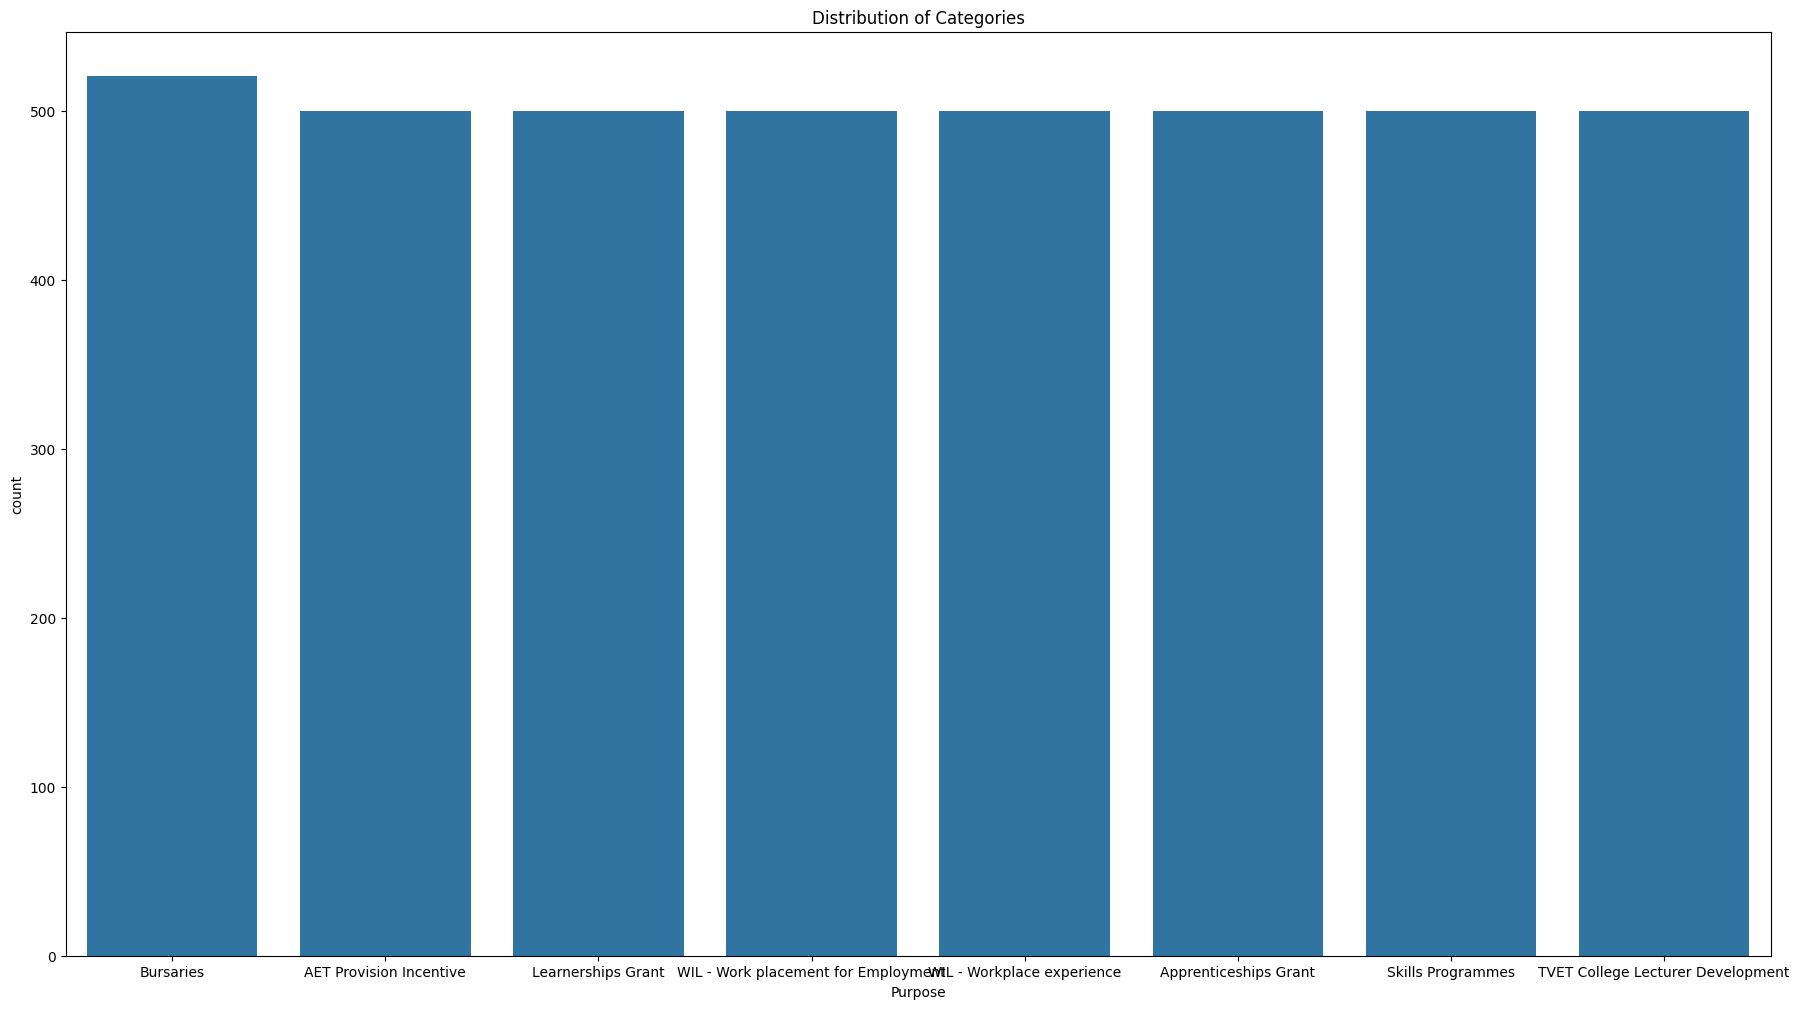

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of categories in the dataset
plt.figure(figsize=(22, 12))
sns.countplot(x='Purpose', data=data)
plt.title('Distribution of Categories')
plt.show()


# Step 4: Splitting Data into Training and Testing Sets

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data['KEYWORDS']
y = data['Purpose']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 3216
Testing set size: 805


# Step 5: Text Preprocessing using TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Shape of transformed training data:", X_train_tfidf.shape)


Shape of transformed training data: (3216, 722)


# Step 6: Model Training

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

print("Model training completed.")


Model training completed.


# Step 7: Model Evaluation

Accuracy on test set: 0.86

Classification Report:
                                     precision    recall  f1-score   support

            AET Provision Incentive       0.93      0.83      0.88        89
              Apprenticeships Grant       0.69      0.84      0.76        81
                          Bursaries       0.92      0.97      0.94       126
                 Learnerships Grant       0.84      0.62      0.71       112
                  Skills Programmes       0.92      0.83      0.88       101
  TVET College Lecturer Development       0.78      0.91      0.84        99
WIL - Work placement for Employment       0.87      0.87      0.87        95
         WIL - Workplace experience       0.91      0.98      0.94       102

                           accuracy                           0.86       805
                          macro avg       0.86      0.86      0.85       805
                       weighted avg       0.86      0.86      0.86       805



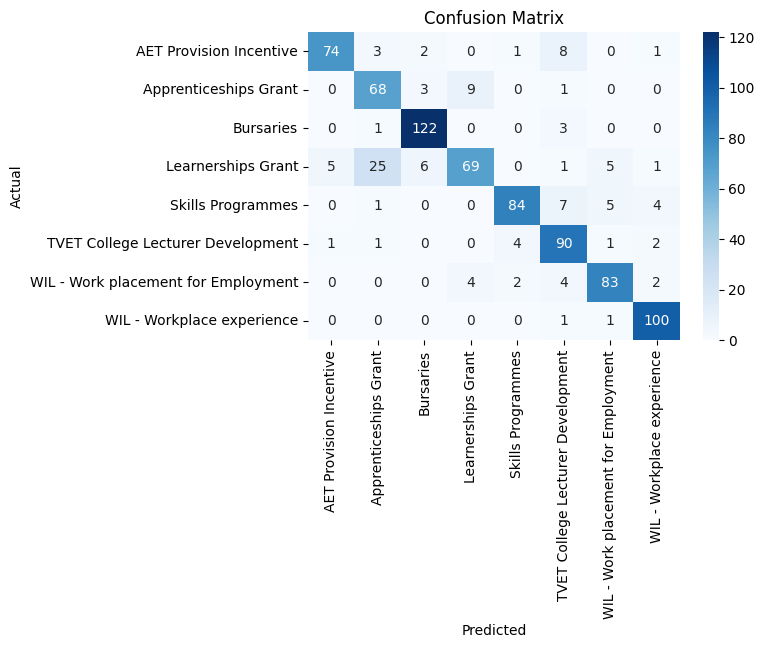

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Step 8: Model Saving

In [8]:
import pickle
from sklearn.pipeline import make_pipeline

# Create a pipeline of the TF-IDF vectorizer and the logistic regression model
model_pipeline = make_pipeline(tfidf, model)

# Save the model to a pickle file
with open('chatbot_model.pkl', 'wb') as model_file:
    pickle.dump(model_pipeline, model_file)

print("Model saved as chatbot_model.pkl")


Model saved as chatbot_model.pkl


# Step 9: Loading and Using the Model

In [10]:
import pickle
# Load the model from the pickle file
with open('C:/Users/JBSLAB6/Documents/CHIETA_CHATBOT/Model/chatbot_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Example usage
new_input = "Awards"
prediction = loaded_model.predict([new_input])

print(f"Predicted category for '{new_input}': {prediction[0]}")


Predicted category for 'Awards': Bursaries
